## Import Libraries

In [3]:
import pandas as pd
import numpy as np
# plotting 
import matplotlib.pyplot as plt 
import seaborn as sns
# for ROC curves 
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
# Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
# models 
from sklearn.ensemble import RandomForestClassifier
# TensorFlow for deep neural neteworks 
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Dropout 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
# VGG model 
from tensorflow.keras.applications import VGG16
# Dataset CIFAR-10
from tensorflow.keras import datasets 

import warnings
# Disable all warnings
warnings.filterwarnings("ignore")

# For Data Augmentation  
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Loading the dataset

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [7]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [10]:
train_labels[1]

array([9], dtype=uint8)

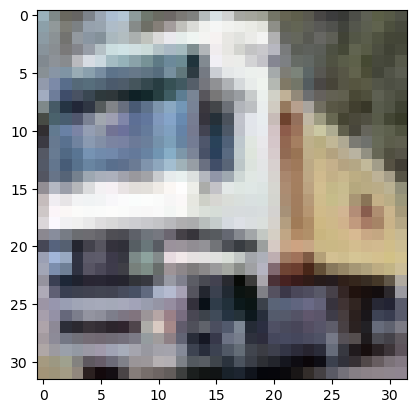

In [12]:
plt.imshow(train_images[1]);
# my eyes 😵‍💫 what a quality 

In [14]:
class_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [16]:
def show_images(n, datasets=train_images, labels= train_labels):
    num_imgs = n
    plt.figure(figsize=(10,5), dpi=150)
    # if the number of images requested is not divisable by 10 make it divisable ➗✅
    if num_imgs % 10 != 0:
        num_imgs += 10 - (num_imgs%10)
    try:
        print("number of images ploted ", num_imgs)
        for i in range(num_imgs):
            # subplot(nrows, ncols, index, **kwargs)
            plt.subplot(num_imgs//10, 10, i+1)
            plt.imshow(datasets[i])
            plt.title(f'{class_labels[labels[i][0]]}')
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()
    except Exception as e:
        print(f"Error {e}")

number of images ploted  50


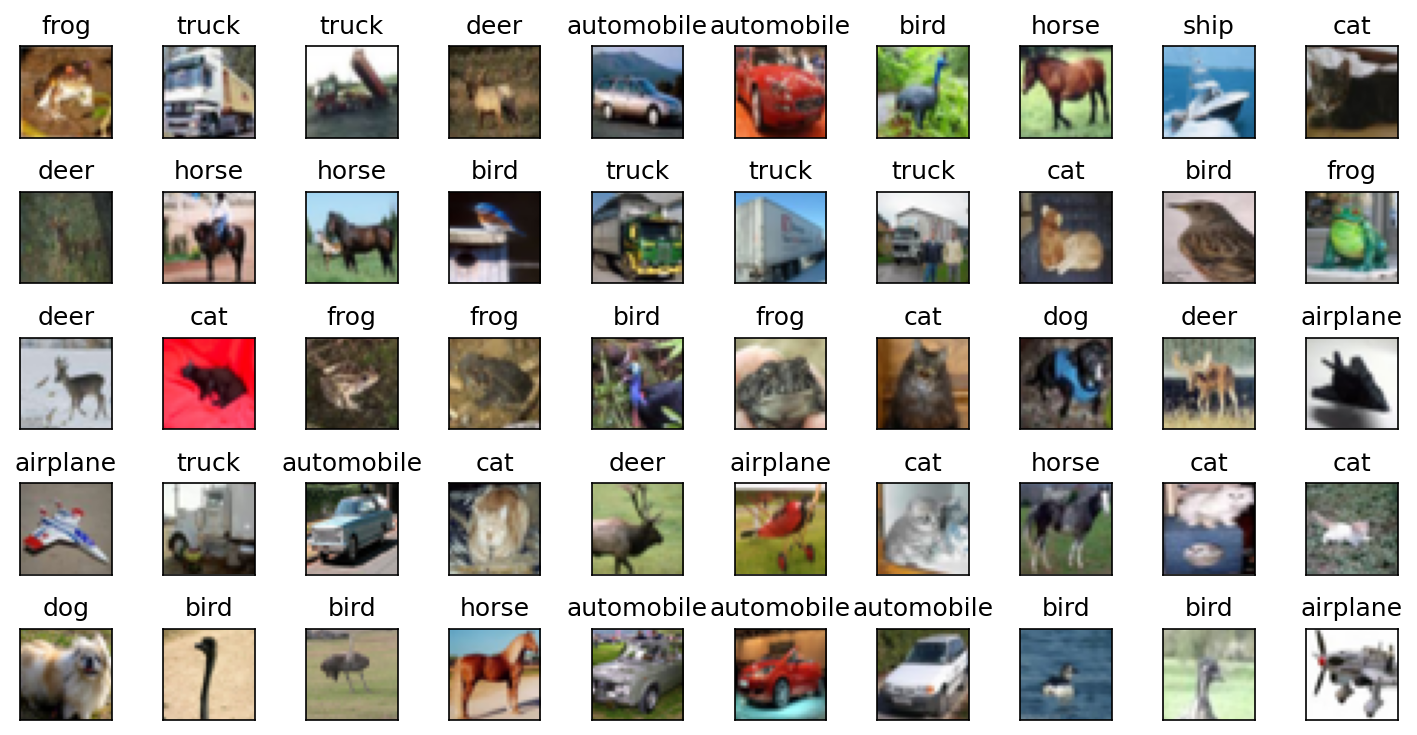

In [17]:
show_images(50)

## VGG WITHOUT DOCUMENTATION

In [18]:
# Preprocess the data
# normalizaion 
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [22]:
# loading the model 
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# include_top determines whether to include the fully connected layers at the top of the network.
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [28]:
# Freeze the layers of the VGG model
for layer in vgg_model.layers:
    layer.trainable = False

In [30]:
# adding the FC layers
# Dense layers 
# Create a new model by adding layers on top of VGG
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# to reduce overfitting 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [32]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [36]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [38]:
# Train the model with EarlyStopping
history = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels), 
                    epochs=15, batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/15
782/782 [==============================] - 325s 413ms/step - loss: 1.9254 - accuracy: 0.3149 - val_loss: 1.5954 - val_accuracy: 0.4662
Epoch 2/15
782/782 [==============================] - 318s 407ms/step - loss: 1.5847 - accuracy: 0.4495 - val_loss: 1.4510 - val_accuracy: 0.5045
Epoch 3/15
782/782 [==============================] - 320s 409ms/step - loss: 1.4749 - accuracy: 0.4875 - val_loss: 1.3831 - val_accuracy: 0.5239
Epoch 4/15
782/782 [==============================] - 314s 402ms/step - loss: 1.4125 - accuracy: 0.5092 - val_loss: 1.3419 - val_accuracy: 0.5379
Epoch 5/15
782/782 [==============================] - 321s 410ms/step - loss: 1.3726 - accuracy: 0.5208 - val_loss: 1.3124 - val_accuracy: 0.5435
Epoch 6/15
782/782 [==============================] - 312s 399ms/step - loss: 1.3420 - accuracy: 0.5340 - val_loss: 1.2880 - val_accuracy: 0.5516
Epoch 7/15
782/782 [==============================] - 317s 405ms/step - loss: 1.3133 - accuracy: 0.5434 - val_loss: 1.2668 -

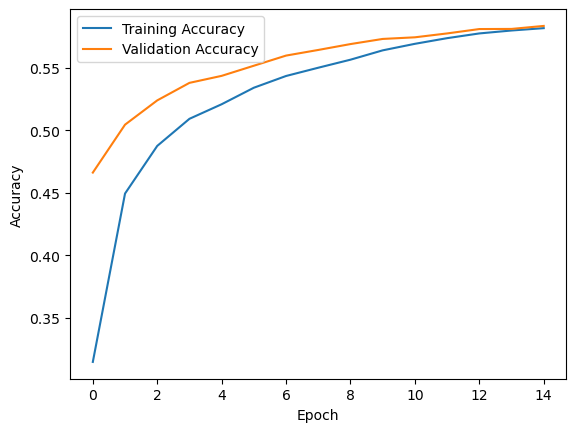

In [42]:
 #Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()